<a href="https://colab.research.google.com/github/xoelmv/Aprendizaje-Automatico/blob/main/Lab4_Parte_2(Redes_neuronales_usando_Keras_con_Regularizaci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eirasf/GCED-AA2/blob/main/lab4/lab4_parte3.ipynb)
# Práctica 4: Redes neuronales usando Keras con Regularización
## Parte 3. Dropout

En esta tercera parte, veremos cómo tratar el *overfitting* mediante la técnica de *Dropout* que consiste en usar un solo modelo para simular tener una gran cantidad de arquitecturas de red diferentes de las que se van eliminando nodos aleatoriamente durante el entrenamiento.


## Pre-requisitos. Instalar paquetes

Al igual que en las partes anteriores de este Laboratorio 4, necesitaremos TensorFlow, TensorFlow-Datasets y otros paquetes para inicializar la semilla y poder reproducir los resultados.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import numpy as np
import random

#Fijamos la semilla para poder reproducir los resultados
seed=1234
os.environ['PYTHONHASHSEED']=str(seed)
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

Además, cargamos también APIs que vamos a emplear para que el código quede más legible

In [2]:
from matplotlib import pyplot
from tensorflow import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
# Incluímos la capa de Keras que nos permitirá hacer Dropout
from keras.layers import Dropout


##Cargamos el conjunto de datos

De nuevo, seguimos empleando el conjunto *german_credit_numeric*, dividiendo en entrenamiento y test.


In [3]:
# Cargamos el conjunto de datos
ds_train = tfds.load('german_credit_numeric', split='train[:80%]',  as_supervised=True).batch(128)
ds_test = tfds.load('german_credit_numeric', split='train[20%:]', as_supervised=True).batch(128)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/german_credit_numeric/incomplete.2HAFCF_1.0.0/german_credit_numeric-train.…

Dataset german_credit_numeric downloaded and prepared to /root/tensorflow_datasets/german_credit_numeric/1.0.0. Subsequent calls will reuse this data.


Establecer la función de pérdida, el algoritmo que vamos a emplear para el entrenamiento y la métrica que nos servirá para evaluar el rendimiento del modelo entrenado.

In [4]:
#Indicamos la función de perdida, el algoritmo de optimización y la métrica para evaluar el rendimiento
fn_perdida = tf.keras.losses.BinaryCrossentropy()
optimizador = tf.keras.optimizers.Adam(0.001)
metrica = tf.keras.metrics.AUC()

## Creamos un modelo *Sequential* con capas *Dropout*
La forma más simple de crear *Dropout* en Keras nos la proporciona la capa *Dropout*. Cuando se crea la capa *Dropout* se puede especificar la probabilidad de poner cada entrada a cero. Así, estableciendo una tasa de deserción a 0.2 indica que el 20% de las entradas estará a 0.
La capa *Dropout* se agrega a un modelo entre capas existentes y se aplica a las salidas de la capa anterior, antes de alimentar a la siguiente.


Recomendaciones para usar *Dropout*:
1. Utilizar una tasa de abandono pequeña del 20% al 50% de las neuronas, el 20% constituye un buen punto de partida. Una probabilidad demasiado baja tiene un efecto mínimo y un valor demasiado alto da como resultado *underfitting* por parte de la red.

1. Red grande. Es probable que se obtenga un mejor rendimiento cuando se utiliza *Dropout* con una red más grande, lo que le da al modelo una mayor oportunidad para aprender representaciones independientes.
1. Emplear *Dropout* tanto en la capa de entrada como en las capas ocultas.

**TO-DO**: Cambia el ratio de abandono en las distintas capas y evalúa las diferencias entre entrenamiento y test.


In [5]:
tamano_entrada = 24
h0_size = 5
h1_size = 3
#TODO - define el modelo indicando un nombre
model =  tf.keras.models.Sequential(name="Model")

model.add( tf.keras.layers.InputLayer((tamano_entrada,)))
#TODO - incluye las 3 capas Dense al modelo
model.add(tf.keras.layers.Dense(h0_size, activation="sigmoid"))
model.add(tf.keras.layers.Dropout(0.2,))
model.add(tf.keras.layers.Dense(h1_size, activation="sigmoid"))
model.add(tf.keras.layers.Dropout(0.2,))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#Se construye el modelo y se muestra
model.build()
print(model.summary())

Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │           125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

None


Completar el método *compile*.

In [6]:
#TODO - indicar los parametros del método compile
model.compile(loss=fn_perdida,
              optimizer=optimizador,
              metrics=[metrica])

Completar el método *fit* tal y como hemos hecho en los laboratorios anteriores.

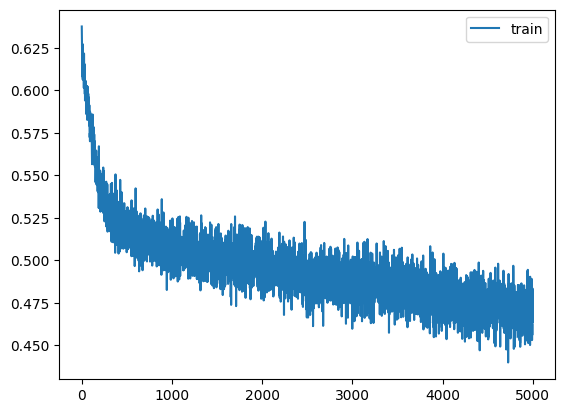

In [7]:
#TODO - entrenar el modelo
num_epochs =  5000
history = model.fit(ds_train, epochs=num_epochs, verbose=0)
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

Evaluación sobre el conjunto de test (no usado para el entrenamiento).

In [8]:
#TODO - llamar a evaluate usando el conjunto de test
result = model.evaluate(ds_test)
print(model.metrics_names)
print(result)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8312 - loss: 0.4491  
['loss', 'compile_metrics']
[0.47945132851600647, 0.8097890615463257]


#### Modelo sin dropout

In [9]:
#Indicamos la función de perdida, el algoritmo de optimización y la métrica para evaluar el rendimiento
fn_perdida = tf.keras.losses.BinaryCrossentropy()
optimizador = tf.keras.optimizers.Adam(0.001)
metrica = tf.keras.metrics.AUC()

In [10]:

#TODO - define el modelo indicando un nombre
model0 =  tf.keras.models.Sequential(name="Model_0")

model0.add( tf.keras.layers.InputLayer((tamano_entrada,)))
#TODO - incluye las 3 capas Dense al modelo
model0.add(tf.keras.layers.Dense(h0_size, activation="sigmoid"))
model0.add(tf.keras.layers.Dense(h1_size, activation="sigmoid"))
model0.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#Se construye el modelo y se muestra
model0.build()
print(model0.summary())

Model: "Model_0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 5)              │           125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
#TODO - indicar los parametros del método compile
model0.compile(loss=fn_perdida,
              optimizer=optimizador,
              metrics=[metrica])

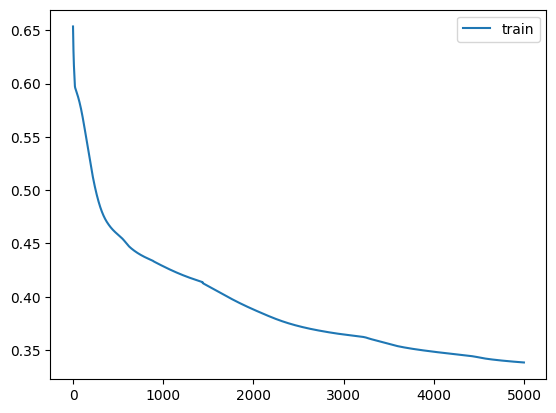

In [12]:
#TODO - entrenar el modelo
history0 = model0.fit(ds_train, epochs=num_epochs, verbose=0)
# plot training history
pyplot.plot(history0.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [13]:
#TODO - llamar a evaluate usando el conjunto de test
result_0 = model0.evaluate(ds_test)
print(model0.metrics_names)
print(result_0)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_1: 0.8893 - loss: 0.3674  
['loss', 'compile_metrics']
[0.41059041023254395, 0.865596354007721]


### Segundo modelo: cambiando dropout

In [14]:
#Indicamos la función de perdida, el algoritmo de optimización y la métrica para evaluar el rendimiento
fn_perdida = tf.keras.losses.BinaryCrossentropy()
optimizador = tf.keras.optimizers.Adam(0.001)
metrica = tf.keras.metrics.AUC()

In [15]:
model_2 =  tf.keras.models.Sequential(name="Model_2")

model_2.add( tf.keras.layers.InputLayer((tamano_entrada,)))
#TODO - incluye las 3 capas Dense al modelo
model_2.add(tf.keras.layers.Dense(h0_size, activation="sigmoid"))
model_2.add(tf.keras.layers.Dropout(0.4,))
model_2.add(tf.keras.layers.Dense(h1_size, activation="sigmoid"))
model_2.add(tf.keras.layers.Dropout(0.4,))
model_2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#Se construye el modelo y se muestra
model_2.build()
print(model_2.summary())

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 5)              │           125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [16]:

#TODO - indicar los parametros del método compile
model_2.compile(loss=fn_perdida,
              optimizer=optimizador,
              metrics=[metrica])

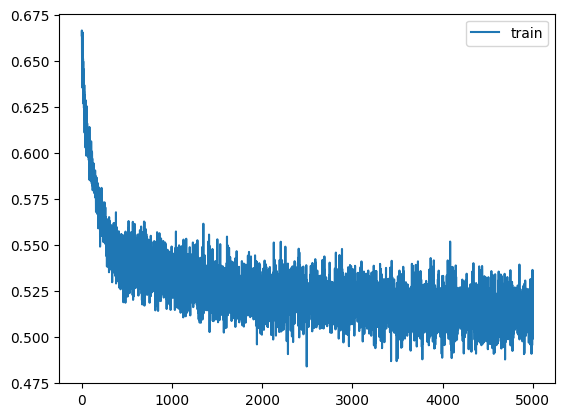

In [17]:
#TODO - entrenar el modelo
history_2 = model_2.fit(ds_train, epochs=num_epochs, verbose=0)
# plot training history
pyplot.plot(history_2.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [18]:
#TODO - llamar a evaluate usando el conjunto de test
result_2 = model_2.evaluate(ds_test)
print(model_2.metrics_names)
print(result_2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_2: 0.8399 - loss: 0.4636  
['loss', 'compile_metrics']
[0.4878188371658325, 0.8184617757797241]


### Tercer Modelo

In [19]:
#Indicamos la función de perdida, el algoritmo de optimización y la métrica para evaluar el rendimiento
fn_perdida = tf.keras.losses.BinaryCrossentropy()
optimizador = tf.keras.optimizers.Adam(0.001)
metrica = tf.keras.metrics.AUC()

In [20]:
model_3 =  tf.keras.models.Sequential(name="Model_3")

model_3.add( tf.keras.layers.InputLayer((tamano_entrada,)))
#TODO - incluye las 3 capas Dense al modelo
model_3.add(tf.keras.layers.Dense(h0_size, activation="sigmoid"))
model_3.add(tf.keras.layers.Dropout(0.4,))
model_3.add(tf.keras.layers.Dense(h1_size, activation="sigmoid"))
model_3.add(tf.keras.layers.Dropout(0.2,))
model_3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#Se construye el modelo y se muestra
model_3.build()
print(model_3.summary())

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 5)              │           125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
#TODO - indicar los parametros del método compile
model_3.compile(loss=fn_perdida,
              optimizer=optimizador,
              metrics=[metrica])

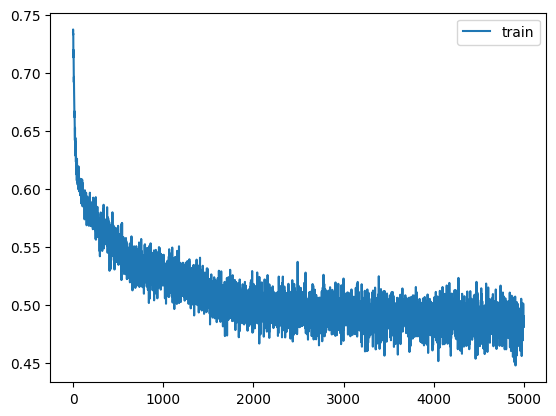

In [22]:
#TODO - entrenar el modelo
history_3 = model_3.fit(ds_train, epochs=num_epochs, verbose=0)
# plot training history
pyplot.plot(history_3.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [23]:
#TODO - llamar a evaluate usando el conjunto de test
result_3 = model_3.evaluate(ds_test)
print(model_3.metrics_names)
print(result_3)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_3: 0.8562 - loss: 0.4191  
['loss', 'compile_metrics']
[0.4528106451034546, 0.8285781741142273]


NO hay sobreajuste, no se observan los beneficios de dropout